About Dataset
Data description

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 


# 1. Import all necessary libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# 2. Exploratory data analysis

In [27]:
data = pd.read_csv("cardio_train.csv", sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [30]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [31]:
data.drop('id',axis=1,inplace=True)
data['age']=(data['age']/365).astype(int)
data.head(100)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,57,1,158,53.0,110,70,1,1,0,0,1,0
96,52,2,165,65.0,110,70,1,1,0,0,1,0
97,50,1,165,99.0,150,110,1,1,0,0,0,1
98,59,2,170,100.0,120,80,1,1,0,0,0,1


In [32]:
hear_corr = data.corr(numeric_only=True)
hear_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


# 3. Data visualization

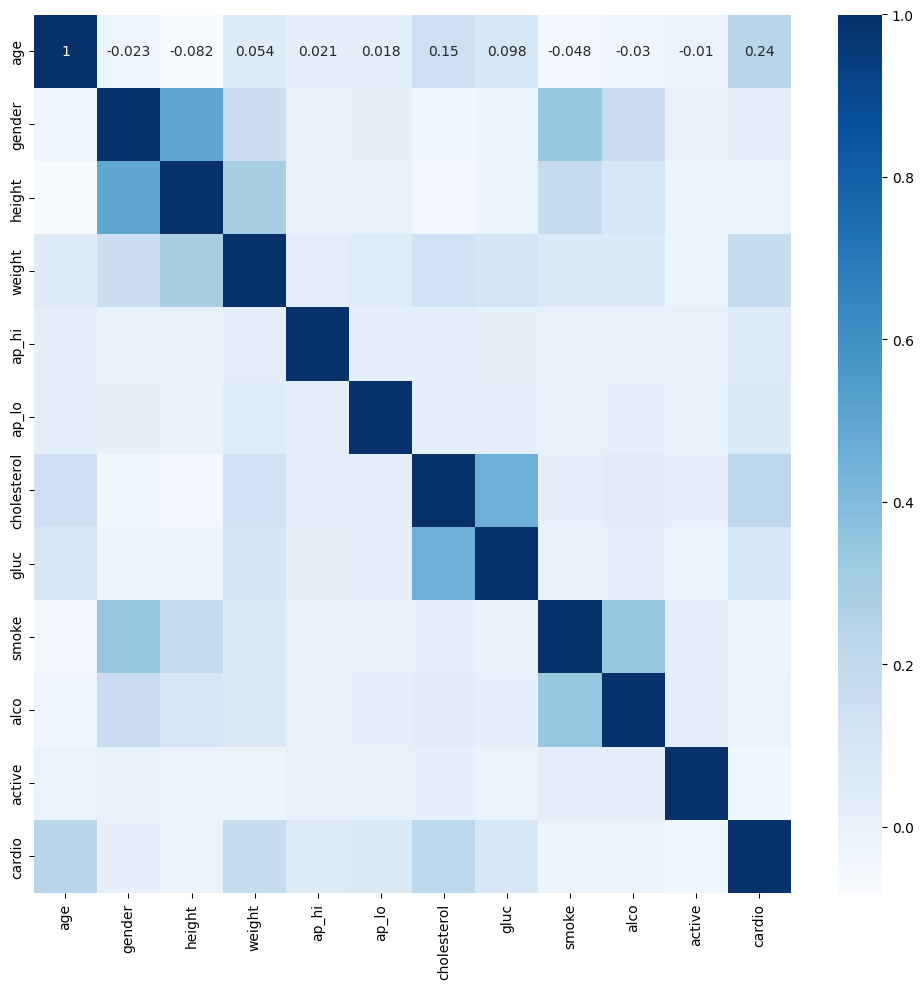

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(hear_corr, annot=True, cmap='Blues')
plt.tight_layout()

In [34]:
age_cardio = pd.DataFrame({
    'The Cardiac disease by average' : data.groupby('age')['cardio'].mean(numeric_only=True),
    'Age' : sorted(data['age'].unique())
})
px.bar(age_cardio, x='Age', y='The Cardiac disease by average', color='Age',
       title='The risk of Cardiac disease by increasing Age')

In [35]:
age_chol = pd.DataFrame({
    'The Cardiac disease by average' : data.groupby('cholesterol')['cardio'].mean(numeric_only=True),
    'The amount of Cholesterol' : ['Normal', 'Above Normal', 'Well Above Normal']
})
px.bar(age_chol, 'The amount of Cholesterol', 'The Cardiac disease by average',
       color='The amount of Cholesterol', title='The risk of Cardiac disease by increasing Cholesterol')

<Figure size 1000x600 with 0 Axes>

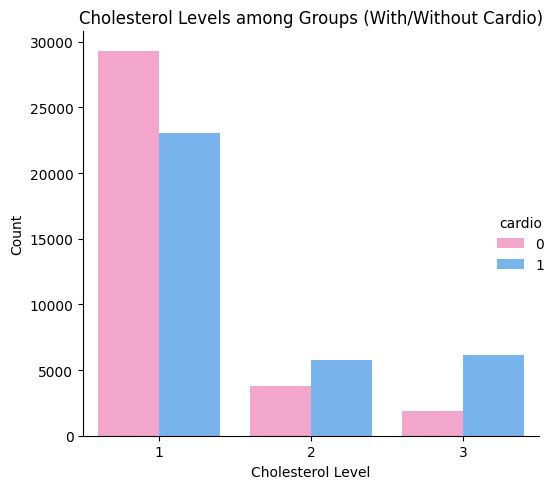

In [36]:
grouped_data = data.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')

# Plotting using Seaborn
colors = ['#ff99cc', '#66b3ff']
plt.figure(figsize=(10, 6))
sns.catplot(x='cholesterol', y='count', hue='cardio',kind='bar',palette=colors, data=grouped_data)
plt.title('Cholesterol Levels among Groups (With/Without Cardio)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 0 - No cardio
# 1 - Cardio

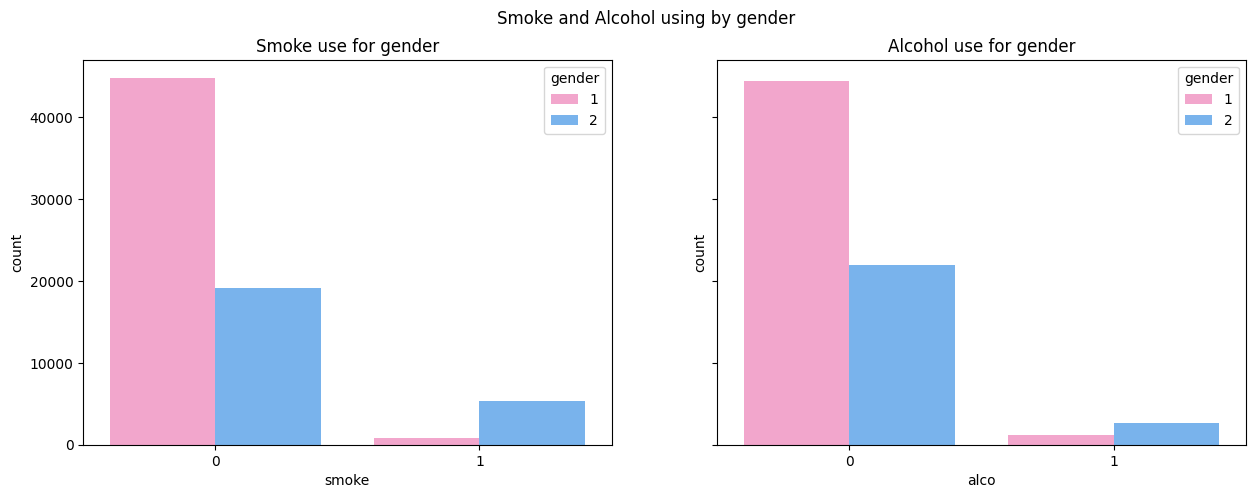

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Smoke and Alcohol using by gender')

sns.countplot(ax=axes[0], x=data.smoke,hue=data.gender,palette=colors)
axes[0].set_title("Smoke use for gender")


sns.countplot(ax=axes[1], x=data.alco,hue=data.gender,palette=colors)
axes[1].set_title("Alcohol use for gender")
plt.show()

# 1 - Male
# 2 - Female

# 4. Data processing

In [38]:
def one_hot_encoder(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [39]:
def standard_scaler(data, columns):
    for column in columns:
        data[column] = (data[column] - data[column].mean()) / data[column].std()
    return data

In [40]:
def min_max_scaler(data, columns):
    for column in columns:
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    return data

In [41]:
df_encoded = one_hot_encoder(data, columns=[
    'gender', 
    'cholesterol', 
    'gluc',
])

In [42]:
X = df_encoded.drop('cardio', axis=1)
y = df_encoded['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Logistic Regression

model=LogisticRegression()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

# Decision Tree
#model = DecisionTreeClassifier()


# Support Vector Machine

#model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
# predict the labels on train dataset

# model = MultinomialNB()

model.fit(X_train, y_train)
print(len(X_test))
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

/home/shyskov/.local/share/virtualenvs/medtech-38Bw5Z6f/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [44]:
accuracy

0.717

In [45]:
conf_matrix

array([[5290, 1698],
       [2264, 4748]])

In [46]:
recall

0.677124928693668

In [47]:
f1

0.7056026155446574

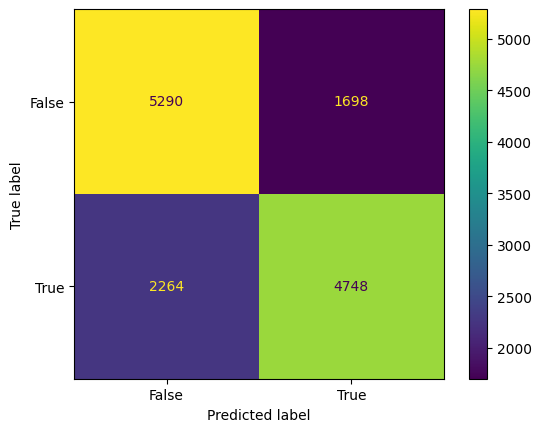

In [48]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

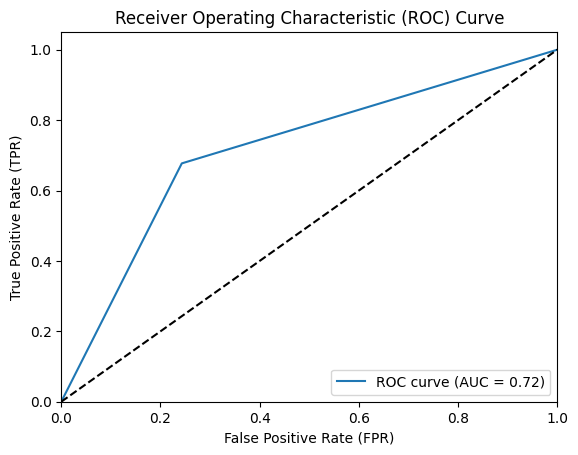

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
import pickle


with open('anomaly_prediction.pkl', 'wb') as file:
    pickle.dump(model, file)